# Exploring & Modelling Obesity Dataset:

***The dataset has 2111 records and 17 features. The records are labeled with the class variable "NObesity" (Obesity Level) that allows classification in 7 groups: "Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II" and "Obesity Type III". The dataset authors note that 23% of the records were collected directly from users through a web platform, and the remaining 77% were generated synthetically with Weka tool and SMOTE filter.***

***Eating habits, physical activity, and genes are factors which affect person's obesity predisposition. The task here is to explore the dataset, and to find a decent model that would be capable to tell if someone is overweight or obese, or his or her body fits into the normal (health) range. On the other hand, an attempt was made to cluster the data based on all features (predictors). Both - classification and clustering - tasks are described after data exploration***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
import scikitplot as skplt

%matplotlib inline

# Load Data:

In [2]:
obesity_data=pd.read_csv(r"C:\Users\hp\Downloads\archive (5)\ObesityDataSet_raw_and_data_sinthetic.csv")
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**A brief check confirms the dataset has 2111 rows and 17 columns.**

In [3]:
obesity_data.shape

(2111, 17)

# Exploratory Data Analysis:

In [4]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Explore Features:

In [5]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

# Gender:
**There are almost an equal number of females and males in the dataset. Data is available for slightly more men than women but this does not make it imbalanced.**

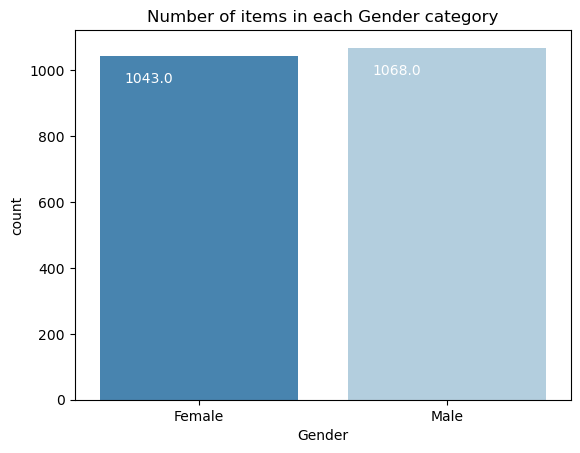

In [6]:
count_values(obesity_data, "Gender")

# Age
**Computing and visualizing distribution of continuous values is wrapped in a function, too. It displays not only data distribution but also its mean and median**

In [7]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

**The youngest person in the dataset is 14 years old, and the oldest one - 61 years of age. Values in this column are not normally distributed; the historgram is positively skewed with mean (24.31) and median (22.78) closer to the lower bound.**

In [8]:
obesity_data['Age'].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [9]:
obesity_data['Age'].median()

22.77789

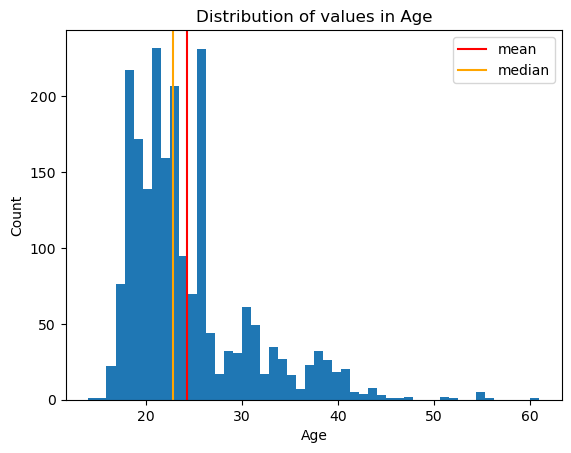

In [10]:
plot_distribution(obesity_data, "Age")

# Height
**Obesity is determined by computing the Body mass index. It is a function of person's height and weight. The exact formula is  
B
o
d
y
m
a
s
s
i
n
d
e
x
=
W
e
i
g
h
t
/
H
e
i
g
h
t
∗
H
e
i
g
h
t
 . Thus, height is an important element for determining obesity.

Distribution of height values is plotted below. Most people are 1.60 m - 1.85 m tall. Both mean and median values are around 1.70. Still, height values do not seem to be normally distributed.**

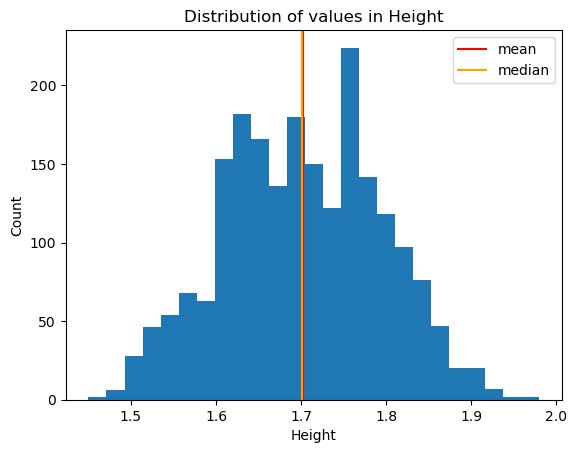

In [11]:
plot_distribution(obesity_data, "Height")

# Weight
**Weight does not offer interesting observations. Distribution is more or less bi-modal; the mean and the median are shifted to the left because of the larger number of people weighting 80 kg.**

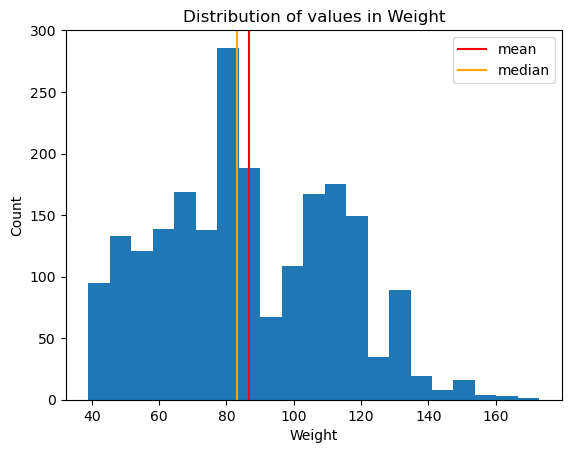

In [12]:
plot_distribution(obesity_data, "Weight")

**It would be interesting to see if there is any relationship between "Height" and "Weight" since both metrics are used to compute Body mass index. Furthermore, these are the most important features (see Chapter V) for predicting if a person suffers from overweight/obesity.**

**The code line below plots each person's weight and height. The red line shows that there is a positive correlation between them, which means an increase in one variable leads to an increase in the other. In other words, taller people are more likely to weight more.**

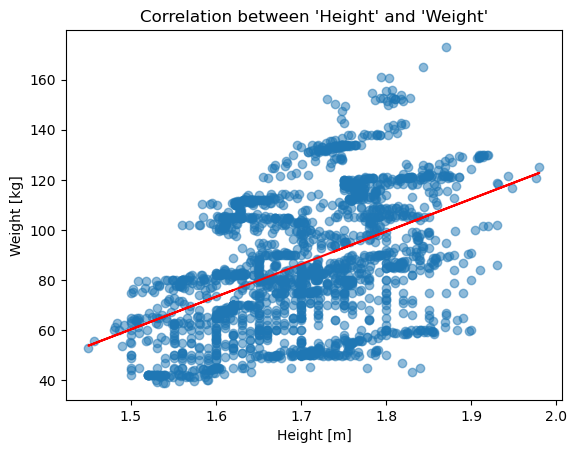

In [13]:
plt.scatter(obesity_data["Height"], obesity_data["Weight"], alpha = 0.5)
m, b = np.polyfit(obesity_data["Height"], obesity_data["Weight"], 1)
plt.plot(obesity_data["Height"], m * obesity_data["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

**Does overweight run in the family?**

**People were asked if family members suffered from overweight. Most of them replied affirmative.**

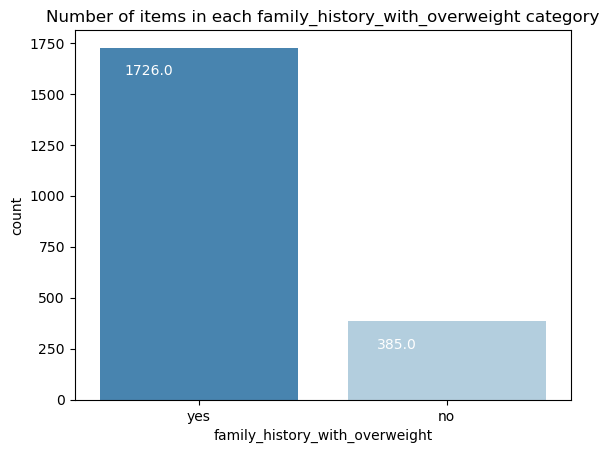

In [14]:
count_values(obesity_data, "family_history_with_overweight")

**Consumption of high caloric food**

**Survey respondents had to say if they eat high caloric food frequenty. There were only two possible answers: "yes" or "no". Most of them (ca. 88%) admitted they consume high caloric food.**

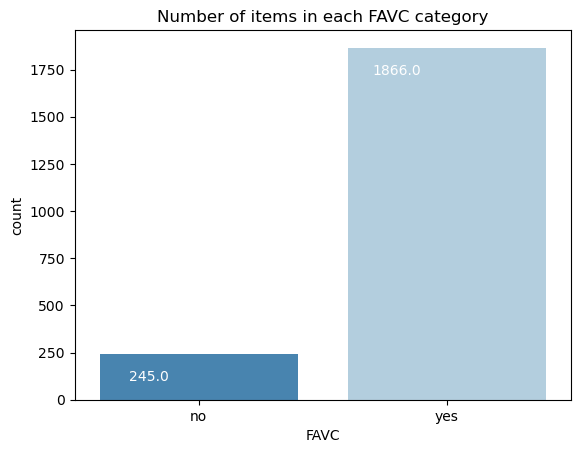

In [15]:
count_values(obesity_data, "FAVC")

 **Consumption of vegetables**
 
**"FCVC" column denotes if people consume vegetables. Possible answers were "Never", "Sometimes", and "Always". It is not clear why values are numeric and not categorical (discrete) ones. It could be assumed that "3" means "Always", "2" - "Sometimes", and "1" - "Never", but it is not clear what the values inbetween mean.**

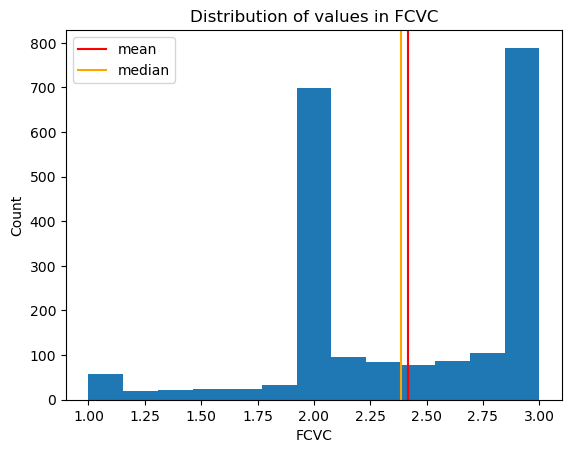

In [16]:
plot_distribution(obesity_data, "FCVC")

**Meals per day**

**Similarly, repondents had to point the number of main meals they have daily: "Between 1 and 2", "Three", and "More than three". Instead of categorical, this feature also holds numerical values. Mean and median are not informative here either.**

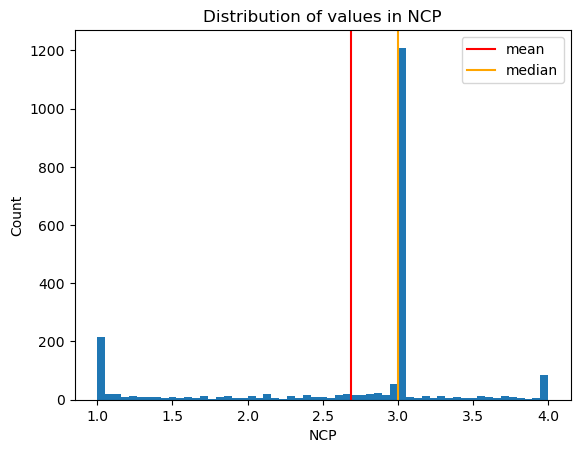

In [17]:
plot_distribution(obesity_data, "NCP")

**Food between meals**

**People had to say if and how offen they eat between meals. They could answer eigher "No" (if they do not get bites between regular time for eating), or "Sometimes", "Frequently", or "Always". The data suggests that most people "sometimes" get small snacks between meals.**

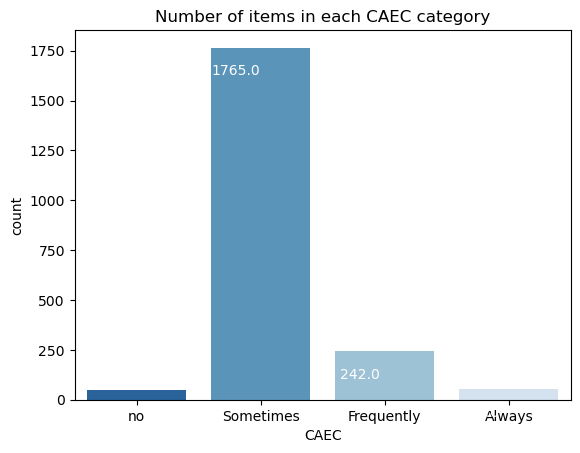

In [18]:
count_values(obesity_data, "CAEC", ["no", "Sometimes", "Frequently", "Always"])

**Smoke**

**Most respondents do not smoke.**

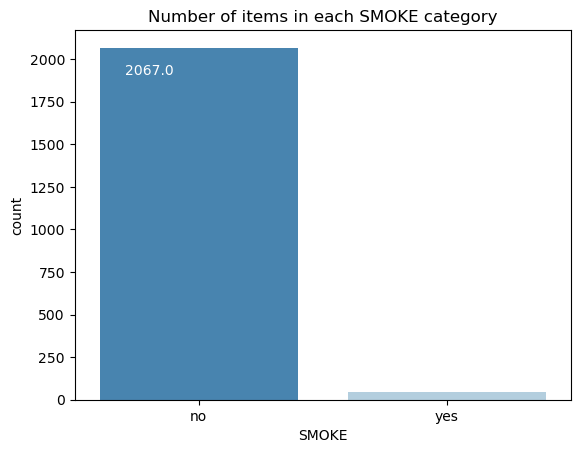

In [19]:
count_values(obesity_data, "SMOKE")

**Drink water**

**Drinking water habits should have been categorised in three groups: "Less than a litter", "Between 1 and 2 L", and "More than 2 L". Instead, the answeres are entered as continuous values. Their distribution (not very informative, too) is shown below.**

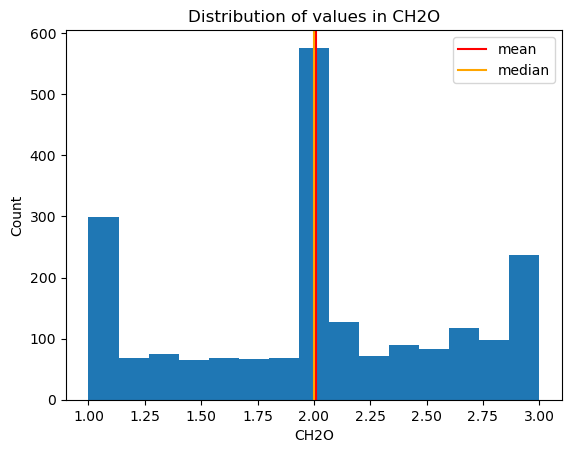

In [20]:
plot_distribution(obesity_data, "CH2O")

**Monitor intake of calories**

**It seems people do not worry about the calories they get daily. On the other hand, they might not have been aware of the nutritional value and ingredients of each food if these were not listed on the packing.**

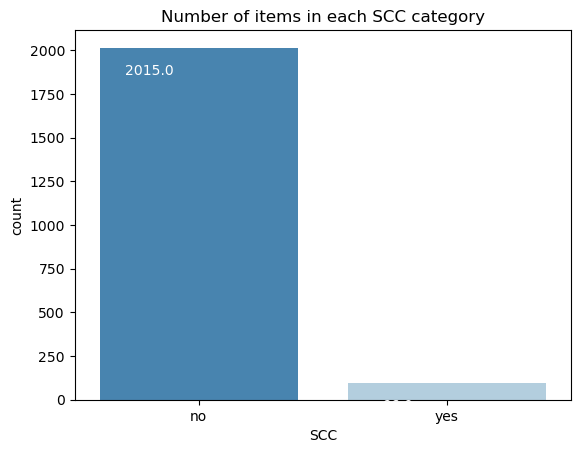

In [21]:
count_values(obesity_data, "SCC")

**Physical activity**

**Respondents were asked to share their physical activity. They had to choose 1 out of 4 optional answers: "I do not have", "1 or 2 days", "2 or 4 days", and "4 or 5 days". Values in "FAF" column are continuous instead of categorical ones. These are plotted below but their distribution (as well as mean and median) are hard for interpretation.**

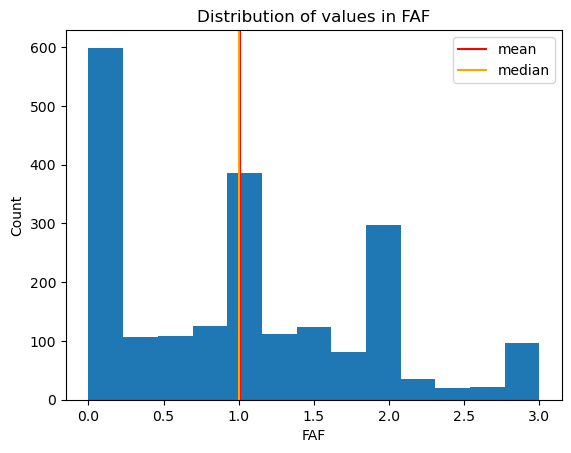

In [22]:
plot_distribution(obesity_data, "FAF")

**Physical INactivity**

**Similarly, people were asked to state how much time they spend on using technological devices such as cell phone, videogames, television, computer, etc. They could say "0-2 hours", "3-5 hours", and "More than 5 hours". Responses are stored as continuous values. Their distribution, which could not be interepreted, is shown below.**

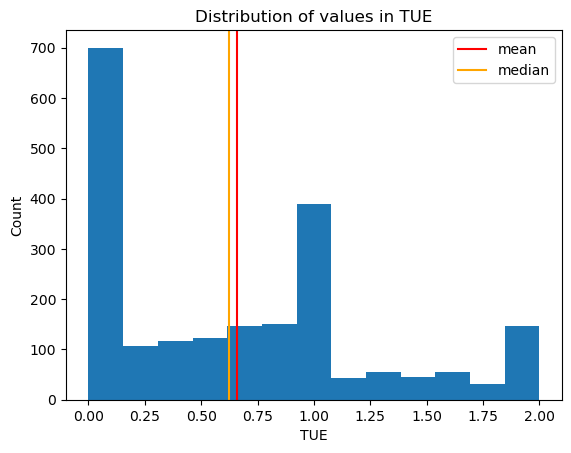

In [23]:
plot_distribution(obesity_data, "TUE")

**Drink alcohol**

**Most people drink alcohol "sometimes", but almost a third claim they do not consume any alcoholic beverages.**

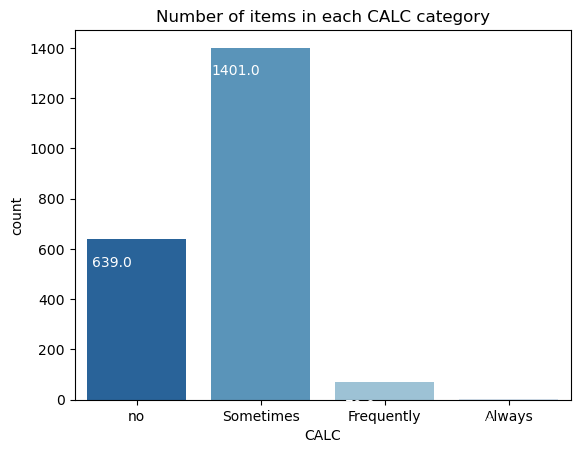

In [24]:
count_values(obesity_data, "CALC")

**Transportation**

**Most people (around 3/4) rely on public transportation. Much fewer respondents use their cars. The remainder either commute or use a bike or motorbike.**

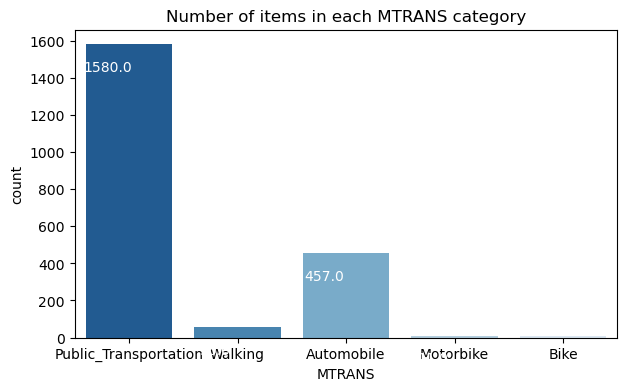

In [25]:
plt.figure(figsize = (7, 4))
count_values(obesity_data, "MTRANS")

**Normal, Overweight or Obese?**

**People,according to their Body mass index (BMI), are categorised as:**

-Underweight if BMI < 18.5

-Normal if BMI 18.5 - 24.9

-Overweight if BMI 25.0 - 29.9

-Obesity I if BMI 30.0 - 34.9

-Obesity II if BMI 35.0 to 39.9

-Obesity III if BMI > 40

**Number of people per category is displayed below (note: categories are ordered logically).**

**The plot shows the dataset is balanced; only "Obese Type I" class slightly outnumber the other categories.**

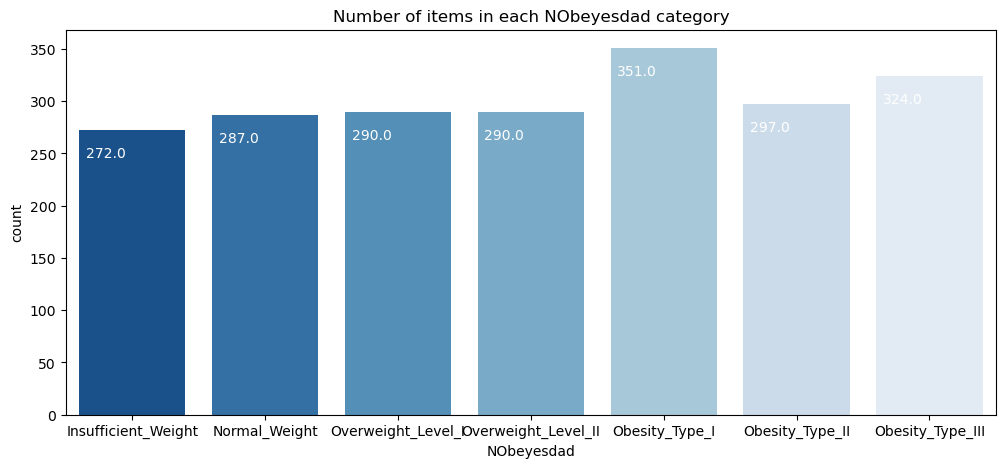

In [26]:
plt.figure(figsize = (12, 5))
count_values(obesity_data, "NObeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

In [27]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    
    plt.show()

**Women are more likely to have "Insufficient weight" than men. On the other hand, there are more obese men than women, save in the last, extreme obesity category.**

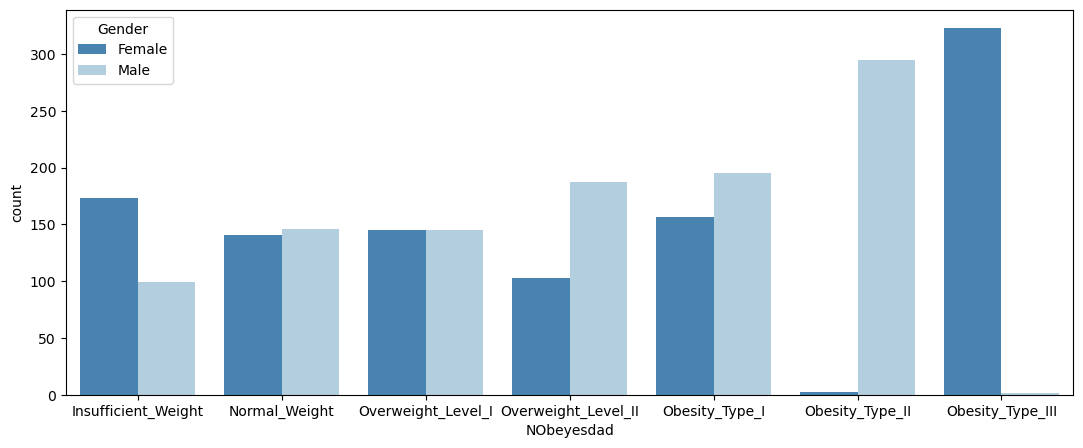

In [28]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

**Overweight and family history**

**It seems obesity runs in the family. All those categorised as overweight or obese had family members suffering from weight problems.**

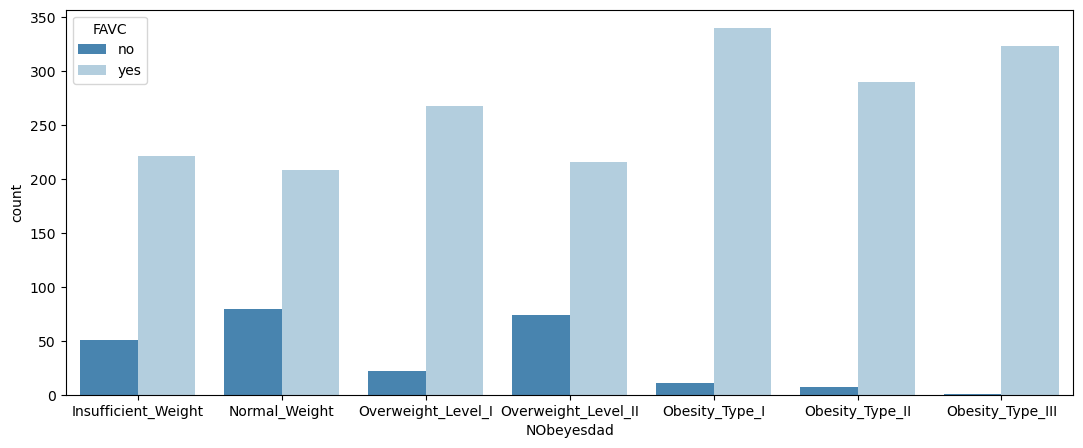

In [29]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

**Overweight and food between meals**

**Weight of those who "frequently" or "always" get food between meals does not seem to be abnormal. Only people having snaks from time to time go into "Overweight" or "Obesity" categories.**

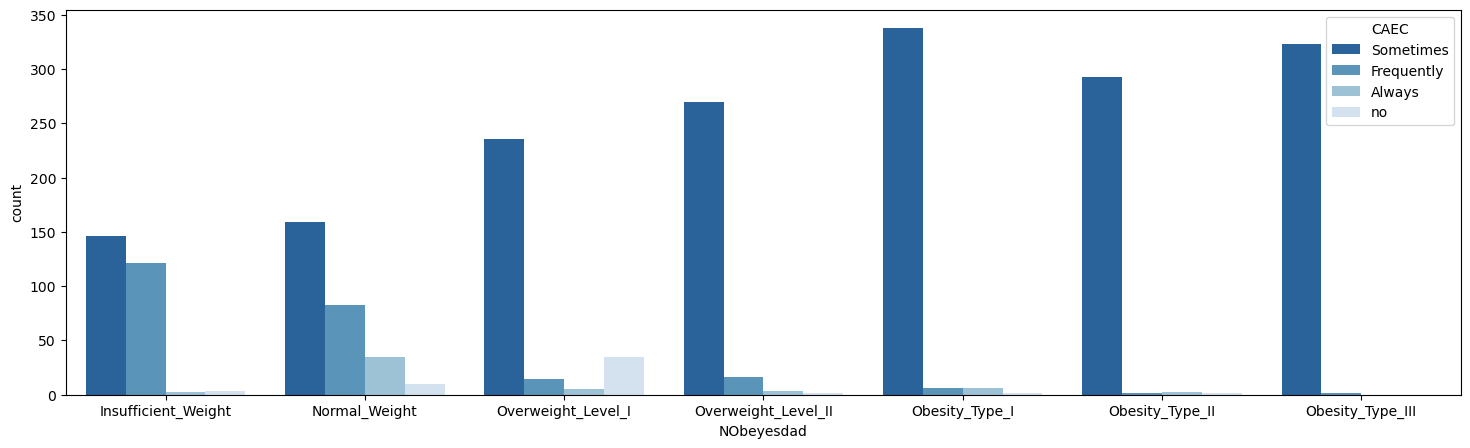

In [30]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

**Overweight and smoking**

**It seems smoking is not a predictor or does not affect body weight. There is a tiny number of smokers who could be both normal and overweight.**

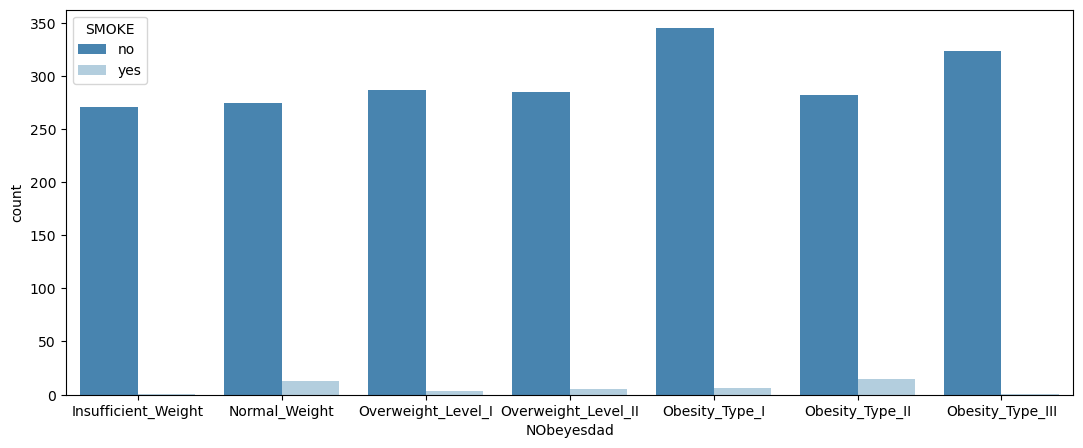

In [31]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "SMOKE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

**Overweight and monitoring calories**

**People who tend to monitor their calories intake are less likely to get excess weight.**

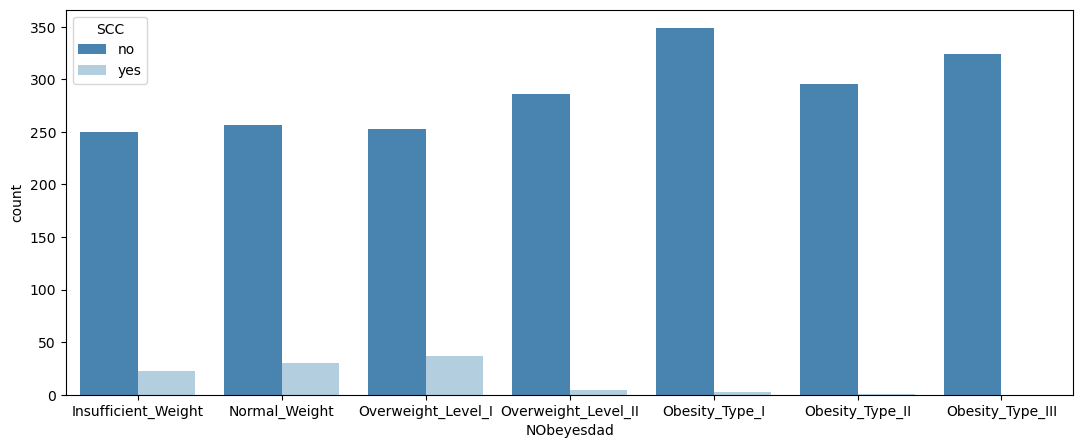

In [32]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "NObeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

**Overweight and alcohol**

**There might exist a weak link between alcohol and obesity. The data suggest that people who "sometimes" drink alcohol could face weight propblems.**

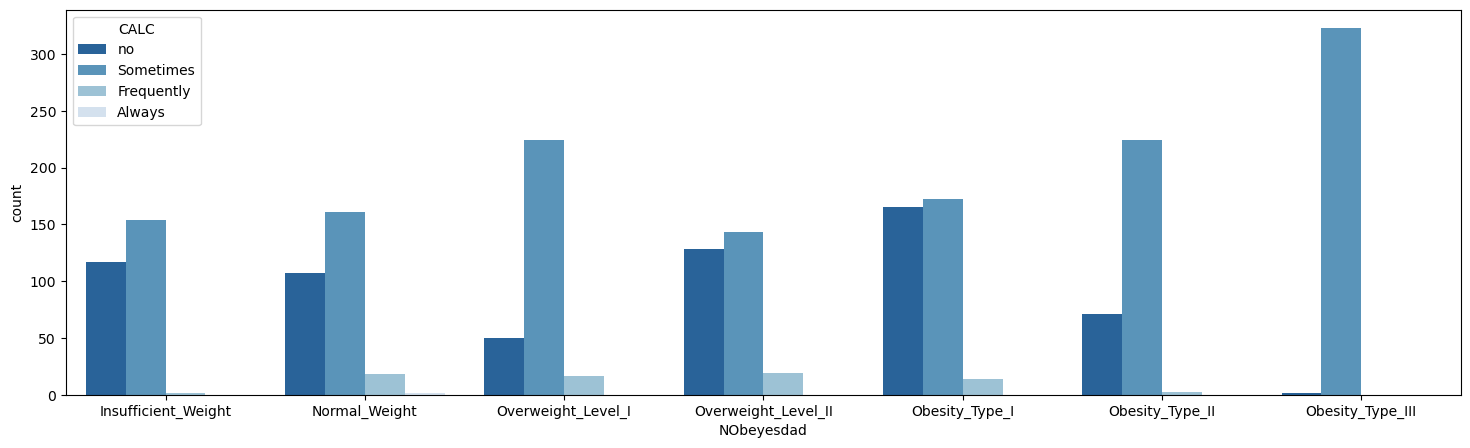

In [33]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "CALC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

**Overweight and means of transport**

**Transportation seems does not (significantly) affect a person's weight. Both slim, normal and overweight people use public transport; all groups rely on cars as well.**

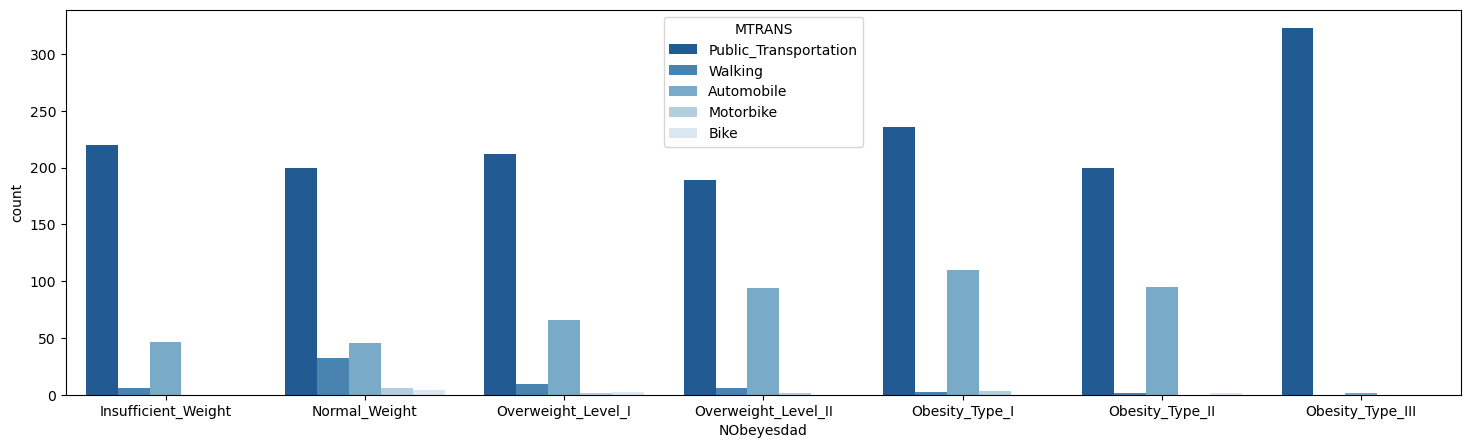

In [34]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "NObeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

# Explore Statistics

In [35]:
obesity_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [36]:
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

**The boxplots below show quartiles and outliers. Distributions in the last 5 columns are not taken into account.**

**The first boxplot suggests that there are outliers in the "Age" column. However, 40, 50 or 60 years of age are normal values (they are not extreme or errors) and for this reason these are not removed. "Height" does not seem to have outliers, and "Weight" has only a couple ones. These are not treated either.**

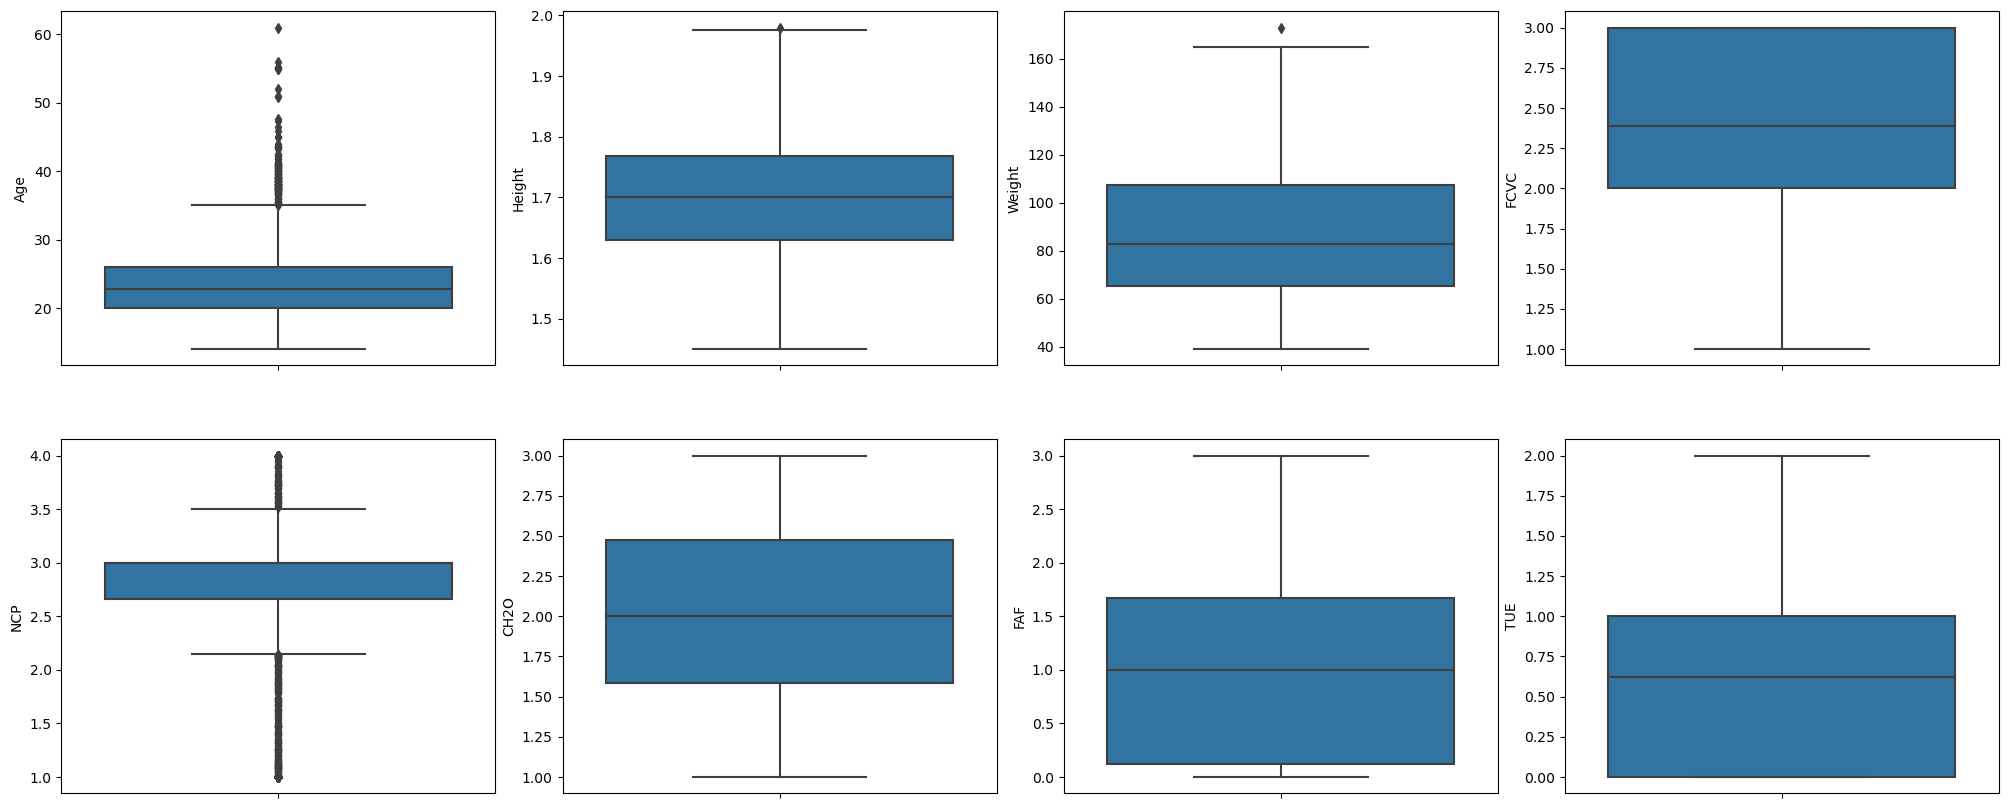

In [37]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in obesity_numeric.items():
    sns.boxplot(y = k, data = obesity_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

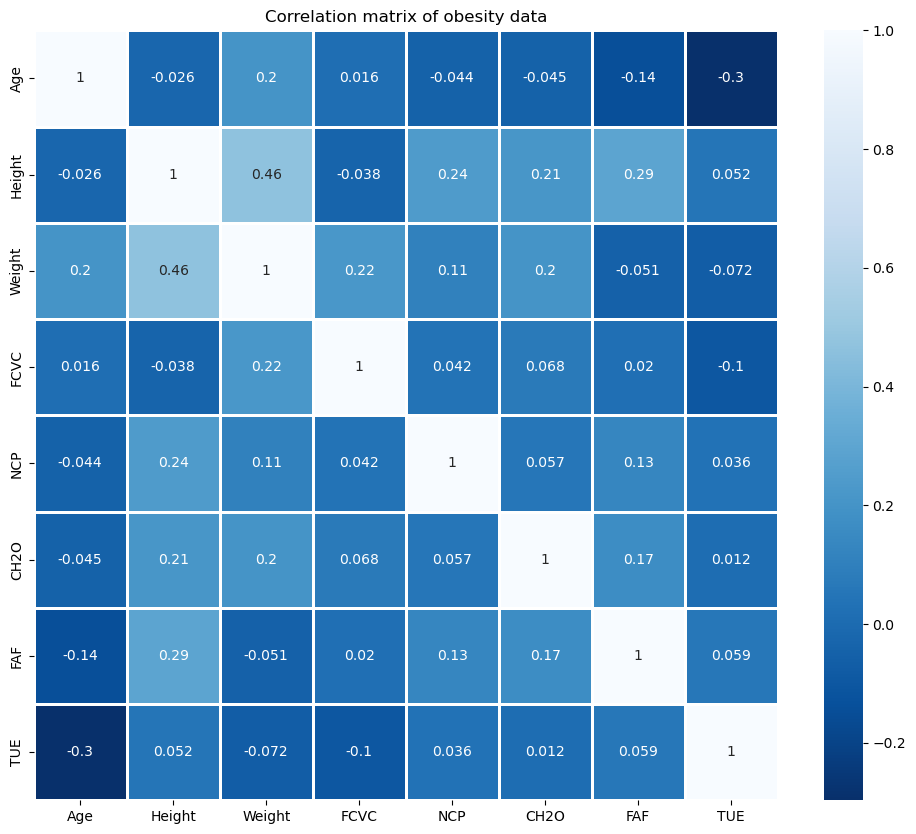

In [38]:
# Select only numeric columns
numeric_columns = obesity_data.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues_r", linewidths=2, linecolor="white")
plt.title("Correlation matrix of obesity data")
plt.show()

# Data pre-processing

**Encoding Features**

In [39]:
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

In [40]:
obesity_lab = obesity_data[["NObeyesdad"]]

**All three sets - numeric features, one-hot encoded ones, and labels are concatenated in a new DataFrame. It has 32 columns now. Its head rows are displayed below.**

In [41]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)

In [42]:
obesity_concatenated.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,True,False,...,False,False,False,True,False,False,False,True,False,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,True,False,...,False,False,True,False,False,False,False,True,False,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,True,...,False,True,False,False,False,False,False,True,False,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,True,...,False,True,False,False,False,False,False,False,True,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,False,True,...,False,False,True,False,False,False,False,True,False,Overweight_Level_II


# Separate Features and Labels:

In [43]:
obesity_label = obesity_concatenated["NObeyesdad"]
obesity_features = obesity_concatenated.drop("NObeyesdad", axis = 1)
obesity_label

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

# Convert Numerical Values

In [44]:
obesity_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   bool   
 9   Gender_Male                         2111 non-null   bool   
 10  family_history_with_overweight_no   2111 non-null   bool   
 11  family_history_with_overweight_yes  2111 no

In [45]:
obesity_features = obesity_features.astype("float")

In [46]:
obesity_features.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

# Scale Features

**Values in all features should be in the same range. Otherwise, the algorithm might misinterpret and assign them wrong coefficients (weights). Obesity features are scaled with MinMaxScaler() which makes all values between 0 and 1. The second row confirms the scaling was successful.**

In [47]:
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)

In [48]:
obesity_features_scaled.min(axis = 1), obesity_features_scaled.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

# Encode Labels

**Most Machine Learning classification algorithms expect labels with numeric values (and not strings). For this reason, obesity class is encoded with LabelEncoder(). The latter replaces each class with an integer.**

**First, the encoder is instantiated. Then, it "overviews" the data. transform() encodes the classes and assigns them the respective number.**

In [49]:
encoder = LabelEncoder()

In [50]:
encoder.fit(obesity_label)

LabelEncoder()

In [51]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [52]:
obesity_labels_encoded = encoder.transform(obesity_label)

In [53]:
obesity_labels_encoded

array([1, 1, 1, ..., 4, 4, 4])

# Train - Test split

**The dataset is split into training and testing sets. A validation set was not withheld since the dataset is small and sufficient number of samples should be kept for training. Cross validation during Grid Search addresses this drawback.**

**Splitting function (train_test_split) shuffles the data and reserves 20% for testing. Datasets' shape after splitting is checked below.**

In [54]:
obesity_features_tr, obesity_features_ts, obesity_labels_tr, obesity_labels_ts = train_test_split(
                obesity_features, obesity_labels_encoded, 
                test_size = 0.2, stratify = obesity_labels_encoded,
                random_state = 0) 

In [55]:
obesity_features_tr.shape, obesity_labels_tr.shape, obesity_features_ts.shape, obesity_labels_ts.shape

((1688, 31), (1688,), (423, 31), (423,))

In [56]:
Counter(obesity_labels_tr)

Counter({6: 232, 4: 259, 3: 237, 5: 232, 0: 218, 2: 281, 1: 229})

In [57]:
Counter(obesity_labels_ts)

Counter({2: 70, 3: 60, 6: 58, 5: 58, 0: 54, 1: 58, 4: 65})

# Train model to classify data into obesity categories:

**The first modelling task is to classify data into obesity categories. "Accuracy" is a good performance metric but "f1 score" (geometric mean of "precision" and "recall") is a more appropriate one. To use it for grid search and cross validation, it is instantiated as a variable.**

**It could be assumed that many classifiers would return good scores. DecisionTreeClassifier() is chosen for its simplicity and interpretability. It has several hyper-parameters, which could be tuned but only tree's depth was used.**

**RandomSearchCV() checks which combination returns best results. The grid space is limited between 5 and 15 tree nodes (questions). These are stored in a dictionary, which is passed to for searching. Models are trained and cross-validated on 5 folds.**

# Build Model

In [58]:
f1 = make_scorer(f1_score, average = "weighted")

In [59]:
params = {
    "max_depth": [5, 7, 9, 11, 13, 15]
}

In [60]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 5, scoring = f1)

In [61]:
grid_search.fit(obesity_features_tr, obesity_labels_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15]},
             scoring=make_scorer(f1_score, average=weighted))

In [62]:
grid_search.cv_results_

{'mean_fit_time': array([0.02949634, 0.04335923, 0.04711313, 0.04739528, 0.05083232,
        0.05390167]),
 'std_fit_time': array([0.00704289, 0.00912791, 0.00100541, 0.00018768, 0.00629347,
        0.00803245]),
 'mean_score_time': array([0.00733361, 0.0103837 , 0.00916166, 0.        , 0.00547757,
        0.        ]),
 'std_score_time': array([0.00678522, 0.0058306 , 0.00591823, 0.        , 0.00675995,
        0.        ]),
 'param_max_depth': masked_array(data=[5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5},
  {'max_depth': 7},
  {'max_depth': 9},
  {'max_depth': 11},
  {'max_depth': 13},
  {'max_depth': 15}],
 'split0_test_score': array([0.81922902, 0.88017817, 0.91402121, 0.89081503, 0.89719769,
        0.89667599]),
 'split1_test_score': array([0.81862166, 0.89519848, 0.94992643, 0.93825524, 0.93812038,
        0.94413049]),
 'split2_test_score': array([0.8325576

In [63]:
grid_search.best_params_

{'max_depth': 9}

# Train and Evaluate Model

In [64]:
model_tree = DecisionTreeClassifier(max_depth = 13, random_state = 42)

**For clarity, fit, predict, and score are placed in a function, which facilitates model training, evaluation and selection. In this particular case it will only print Decision Tree's preformance in terms of its "accuracy" and "f1 score" on both sets.**

In [65]:
def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    """
    Function: Trains model, predict classes and computes accuracy and f1 score.
    
    Parameters: estimator, X_train, y_train, X_test, y_test.
    """
    estimator.fit(train_features, train_labels)
    
    print(f"Accuracy on Train data: {accuracy_score(train_labels, estimator.predict(train_features))}")
    print(f"F1 score on Train data: {f1_score(train_labels, estimator.predict(train_features), average = 'weighted')}")
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    print(f"F1 on Test data: {f1_score(test_labels, estimator.predict(test_features), average = 'weighted')}")

**Both "accuracy" and "f1 score" on the training data are 100% but on the testing one is 91%-92%. The latter suggests the model is overfitting. Its performance could be improved either with regularization (e.g., shallower tree, setting minimum samples per leaf), or with feature selection (e.g., removing non-important columns), or with increasing the number of samples in both sets. Neither of these techniques is explored further since "accuracy" and "f1 score" over 90% is not so disappointing.**

In [66]:
train_predict_score(model_tree, obesity_features_tr, obesity_labels_tr, obesity_features_ts, obesity_labels_ts)

Accuracy on Train data: 1.0
F1 score on Train data: 1.0
Accuracy on Test data: 0.9243498817966903
F1 on Test data: 0.9245167493959944


**Decision trees are easier to interpret. If plotted (see below), they show how decisions were taken (i.e., how classification happened). Each node "asks" a question; if the response is "True", the information is transmitted to the child node on the left; if it is "False", information goes to the child on the right. This process continues either until no more questions could be asked, or until reaching "max_depth" limit. Only the first 2 nodes are displayed below.**

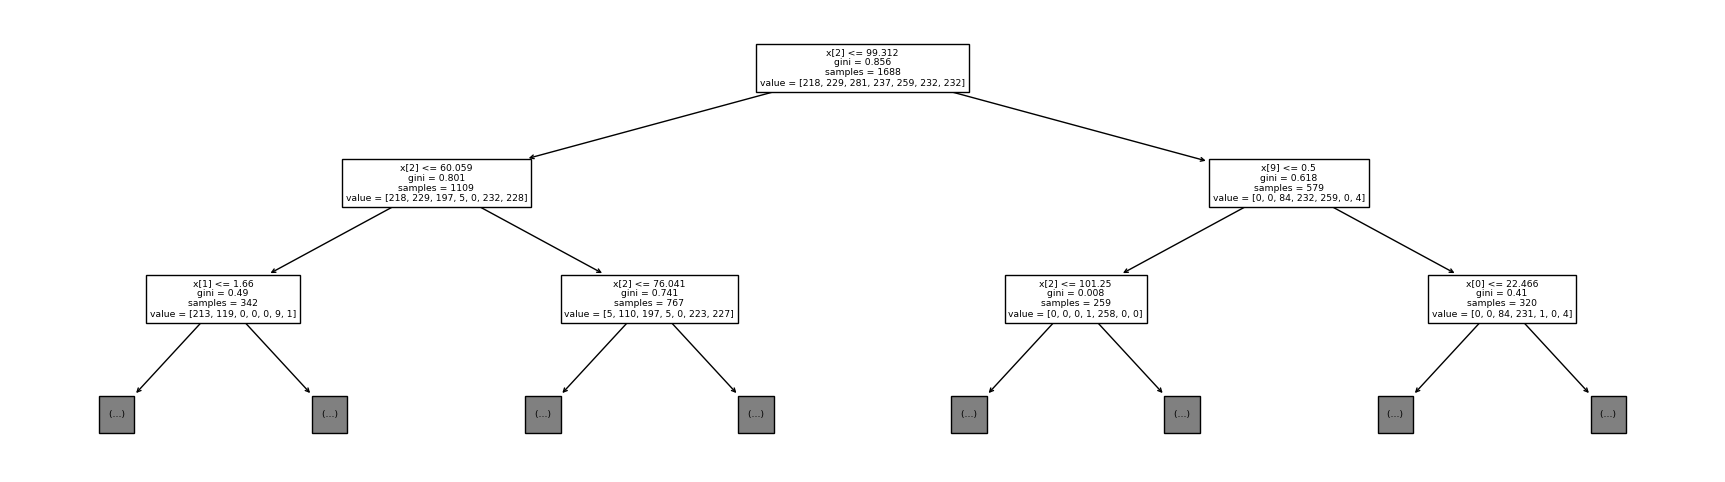

In [67]:
plt.figure(figsize = (22, 6))
plot_tree(model_tree, max_depth = 2)
plt.show()

# Classification Report:

**classification_report is a scikit learn function which shows classification success (metrics) for each class. For example, most of the samples in "Obesity_Type_III" (class 4) were properly classified. The model reached 100% "precision" and 99% "f1 score". On the other hand, features indicating "Normal_Weight" (class 1) were wrongly interpreted and got around 80% on "precision" and "f1 score".**

In [68]:
print(classification_report(obesity_labels_ts, model_tree.predict(obesity_features_ts)))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.84      0.83      0.83        58
           2       0.92      0.94      0.93        70
           3       0.97      0.93      0.95        60
           4       1.00      1.00      1.00        65
           5       0.86      0.93      0.89        58
           6       0.96      0.91      0.94        58

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.93      0.92      0.92       423



In [69]:
model_tree.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [70]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

# confusion Matrix:

**confusion_matrix shows actual vs predicted labels. Rows represent actual classes, while columns represent predicted classes. For example, 47 samples were properly classified in the 0-th class but 7 were wrongly placed in 1-st class. Only one sample of class 4 was misclassified as a sample of class 3.**

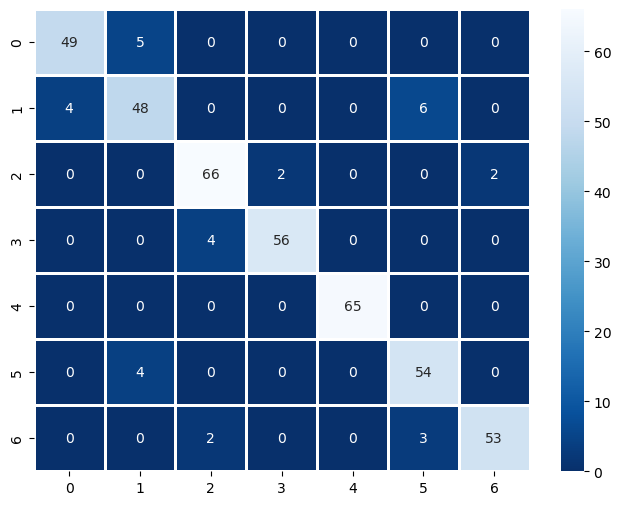

In [71]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(obesity_labels_ts, model_tree.predict(obesity_features_ts)),
           annot = True,
           fmt = ".0f",
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white",
           xticklabels = model_tree.classes_,
           yticklabels = model_tree.classes_)
plt.show()

# ROC Score and Curve:

In [72]:
obesity_score_probability = model_tree.predict_proba(obesity_features_ts)

In [73]:
obesity_score_probability

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

**Aggregated AUC score for all classes (computed as "One vs Rest") is around 95%. This is not so bad performance.**

In [74]:
roc_auc_score(obesity_labels_ts, obesity_score_probability, multi_class = "ovr")

0.9548478741957297

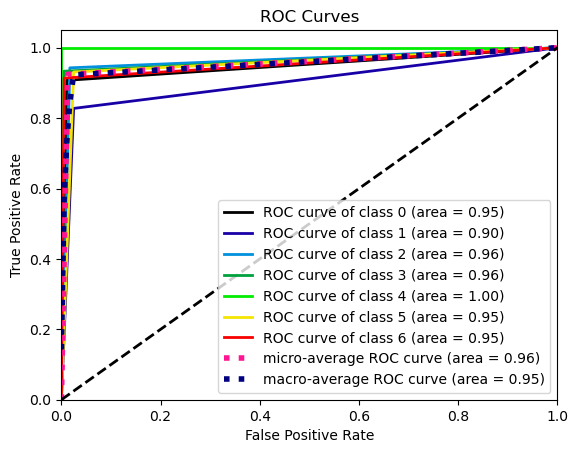

In [75]:
skplt.metrics.plot_roc(obesity_labels_ts, obesity_score_probability)
plt.show()

# Clustering

In [76]:
kmeans = KMeans(n_clusters = 7, init = "k-means++")

In [77]:
model_tree.feature_importances_

array([4.75950417e-02, 2.22200862e-01, 4.76620639e-01, 1.11974099e-02,
       1.01529996e-02, 4.61951922e-03, 5.32942141e-03, 8.33325453e-03,
       0.00000000e+00, 1.57815543e-01, 0.00000000e+00, 0.00000000e+00,
       2.09596289e-02, 4.23563849e-04, 0.00000000e+00, 4.63588132e-03,
       6.91939398e-04, 0.00000000e+00, 2.58803307e-04, 0.00000000e+00,
       0.00000000e+00, 1.03790910e-03, 0.00000000e+00, 1.32245695e-03,
       1.61452526e-03, 2.29610181e-02, 1.10710304e-03, 0.00000000e+00,
       1.12247947e-03, 0.00000000e+00, 0.00000000e+00])

In [78]:
def plot_clusters(dataset, feature_one, feature_two, labels, title = None):
    """
    Function: Computes and displays clusters.
    
    Parameters: dataset, 2 features, cluster indicator.
    """
    sns.scatterplot(data = dataset, x = feature_one, y = feature_two, hue = labels, palette = "Blues_r")
    if title is not None:
        plt.title(title)
    plt.show()

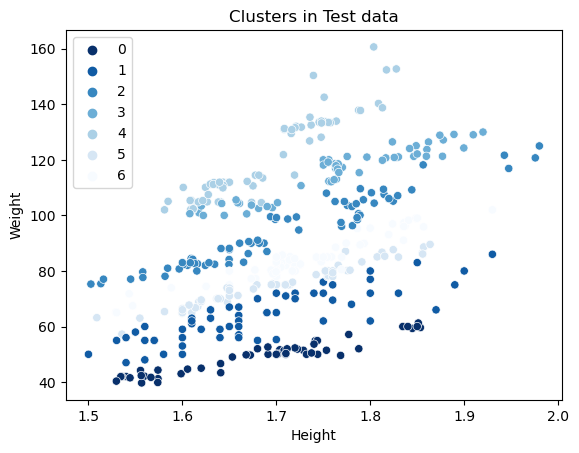

In [79]:
plot_clusters(obesity_features_ts, "Height", "Weight", obesity_labels_ts, "Clusters in Test data")

In [80]:
import warnings
warnings.filterwarnings("ignore")

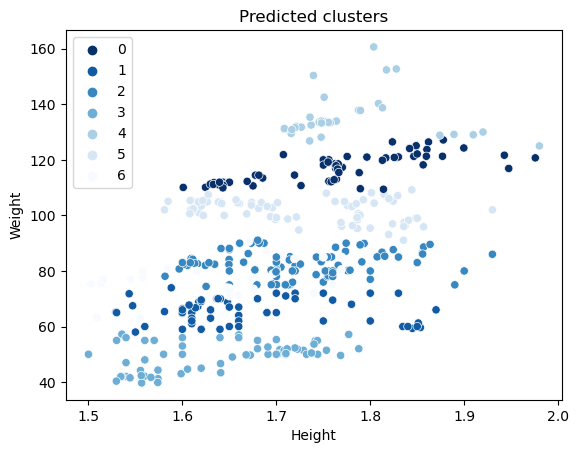

In [81]:
# Assuming you have previously fit the KMeans model and obtained predicted labels
predicted_labels = kmeans.fit_predict(obesity_features_ts)

# Now you can call the plot_clusters function
plot_clusters(obesity_features_ts, "Height", "Weight", predicted_labels, "Predicted clusters")


# Conclusion:

**A person's height and weight are the most important factors determining his/her obesity status. Other factors might also play a role, e.g., eating habits and physical activity. Dataset features could be used both for classification and clustering tasks but it should be borne in mind that most samples are synthetically generated, i.e., they do not reflect the real world. Thus, robust conclusions require much more data representative for larger groups.**

**References:**
    
**[1] Palchor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.**